# ¿Qué es k-NN?

k-Nearest Neighbors es un algoritmo basado en instancias, que no aprende una función explícita durante el entrenamiento. En vez de eso:

Para predecir la etiqueta de un nuevo punto, simplemente busca los k puntos más cercanos en el conjunto de entrenamiento.

Luego, vota (clasificación) o promedia (regresión) las etiquetas de esos vecinos.

## Importar Librerias

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from matplotlib.patches import Circle
from sklearn.linear_model import LinearRegression

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=100: Genera 100 ejemplos (filas).
- n_features=1: Cada ejemplo tiene 1 sola característica (columna).
- noise=15: Agrega ruido gaussiano (error) al valor de salida y. Esto simula datos reales con imprecisiones.
- random_state=42: Fija la semilla aleatoria para que los datos generados sean siempre los mismos (reproducibilidad).


In [2]:
# Generar 100 muestras de 1 caracteristica. incluir ruido.
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

## Visualización de los datos

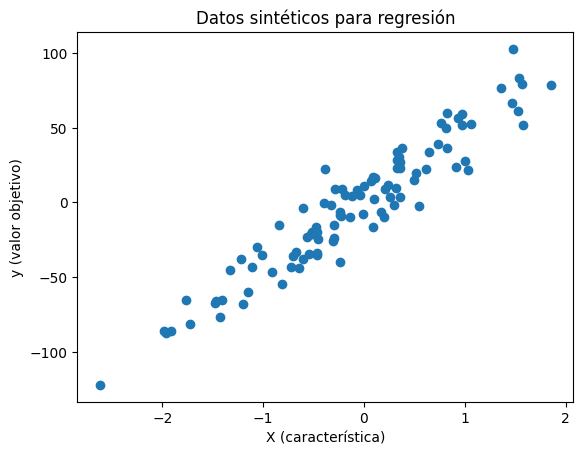

In [3]:
plt.scatter(X, y)
plt.title("Datos sintéticos para regresión")
plt.xlabel("X (característica)")
plt.ylabel("y (valor objetivo)")
plt.show()

# Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer el Pipeline de estandarización y clasificación

In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

## Entrenar el modelo k-NN

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

## Evaluar

In [7]:
y_pred = pipe.predict(X_test)
print("Error absoluto medio (MAE):", mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente R2:", r2_score(y_test, y_pred))

Error absoluto medio (MAE): 12.970063511739633
Error cuadrático medio (MSE): 236.12318392449998
Coeficiente R2: 0.8783205562267665


## Visualización de la regresión

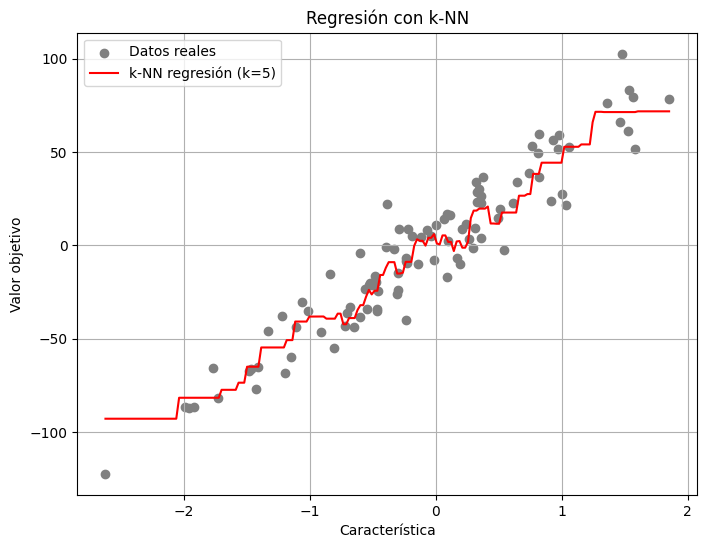

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='gray', label='Datos reales')
# Crear puntos para predecir en forma suave
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_plot = pipe.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='k-NN regresión (k=5)')
plt.title("Regresión con k-NN")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Visualización del vecindario para un ejemplo.

In [9]:
index = 0 
punto_test = X_test[index].reshape(1, -1)
distancias = np.linalg.norm(X_train - punto_test, axis=1)
indices_vecinos = distancias.argsort()[:5] 
punto_predicho = pipe.predict(X_test[index].reshape(1, -1))[0]

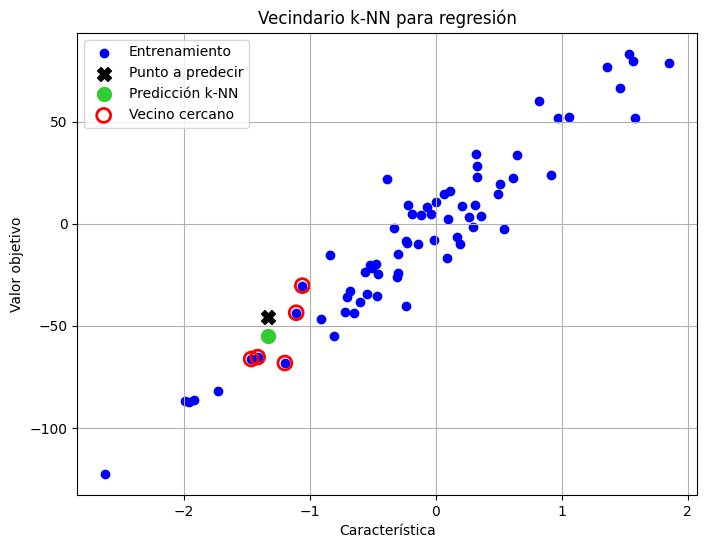

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test[index], y_test[index], color='black', marker='X', s=100, label='Punto a predecir')
plt.scatter(X_test[index], punto_predicho, color='limegreen', marker='o', s=100, label='Predicción k-NN')
for i in indices_vecinos:
    plt.scatter(X_train[i], y_train[i], edgecolor='red', facecolor='none', s=100, linewidth=2, label='Vecino cercano' if i == indices_vecinos[0] else "")
plt.title("Vecindario k-NN para regresión")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()


## Ejercicios
- Cambiar el valor de k y observar el efecto sobre la curva.
- Comparar con regresión lineal simple.